In [1]:
import torch
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1
torch.cuda.device_count()

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


1

In [2]:
import os
import torch
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
torch.cuda.device_count()

1

In [2]:
!CUDA_VISIBLE_DEVICES=1
import torch
torch.cuda.device_count()

2

In [1]:
%set_env CUDA_VISIBLE_DEVICES=1
import torch
torch.cuda.device_count()

env: CUDA_VISIBLE_DEVICES=1


1

In [1]:
# The only way to do it is to launch jupyter this way:

import torch
torch.cuda.device_count()

2

In [3]:
torch.cuda.get_device_name()

'NVIDIA TITAN RTX'

In [4]:
if torch.cuda.is_available():
    torch.cuda.set_device(1)

In [ ]:
experimentsPath = "/raid/elhamod/CIFAR_HGNN/experiments/" #"/raid/elhamod/Fish/experiments/"
dataPath = "/raid/elhamod/" #"/raid/elhamod/Fish/"
experimentName = "CIFAR_phylogeny_tripletloss_new_archi_full"
i=0
device = 0
experiment_params = {"image_path": "cifar-100-python", "suffix": None, "img_res": 32, "augmented": True, "batchSize": 64, "learning_rate": 0.01, "numOfTrials": 2, "fc_layers": 1, "pretrained": True, "epochs": 30, "patience": 12, "optimizer": "adabelief", "scheduler": "cosine", "weightdecay": 0.0005, "modelType": "BB", "lambda": 10, "tl_model": "preResNet", "link_layer": "avgpool", "adaptive_smoothing": True, "adaptive_lambda": 0.1, "adaptive_alpha": 0.1, "tripletEnabled": True, "tripletSamples": 3, "tripletSelector": "semihard", "tripletMargin": 0.3, "phylogeny_loss": False, "displayName": "CIFARpretrained4-Triplet-Cos", "noSpeciesBackprop": False, "phylogeny_loss_epsilon": 0.03}




# experiment_params = {"image_path": "cifar-100-python", "suffix": None, "img_res": 32, "augmented": True, "batchSize": 64, "learning_rate": 0.001, "numOfTrials": 1, "fc_layers": 1, "pretrained": True, "epochs": 30, "patience": 12, "optimizer": "adabelief", "scheduler": "plateau", "weightdecay": 0.0005, "modelType": "BB", "lambda": 10, "tl_model": "preResNet", "link_layer": "avgpool", "adaptive_smoothing": True, "adaptive_lambda": 0.1, "adaptive_alpha": 0.1, "tripletEnabled": False, "tripletSamples": 3, "tripletSelector": "semihard", "tripletMargin": 0.2, "phylogeny_loss": False, "displayName": "CIFARpretrained4-BB", "noSpeciesBackprop": False, "phylogeny_loss_epsilon": 0.03}

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from myhelpers import cifar_dataLoader
from HGNN.train import CNN
from HGNN.train.configParser import getModelName
from configParser import ConfigParser, getModelName
import os
import torch
from myhelpers.resnet_cifar2 import cifar100
import numpy as np
from myhelpers.preresnet_cifar import resnet as preresnet_cifar
import random
# def seed_everything(seed):
#     random.seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
    
# seed_everything(121)

config_parser = ConfigParser(experimentsPath, dataPath, experimentName)
experiment_params = config_parser.fixExperimentParams(experiment_params)
experimentPathAndName = os.path.join(experimentsPath, experimentName)
datasetManager = cifar_dataLoader.datasetManager(experimentPathAndName, dataPath)
datasetManager.updateParams(config_parser.fixPaths(experiment_params))

train_loader, validation_loader, test_loader = datasetManager.getLoaders()
architecture = {
    "fine": len(train_loader.dataset.csv_processor.getFineList()),
    "coarse" : len(train_loader.dataset.csv_processor.getCoarseList())
}

# from myhelpers.resnet_cifar import cifar_resnet56

# # modelName = getModelName(experiment_params, i)
# print(modelName)
# modelName = "models/b07640aa2d0c1aacb31f7bcda75ac772ad8bf53db3dacc06d2280a98"
# trialName = os.path.join(experimentPathAndName, modelName)
# # initModelPath = CNN.getInitModelFile(experimentPathAndName)
# finalModelPath = CNN.getModelFile(trialName)
# model.load_state_dict(torch.load(finalModelPath))

# model = cifar_resnet56(pretrained='cifar100')
model = CNN.create_model(architecture, experiment_params, device=device)
# model = cifar100(128, pretrained=True)
# model = preresnet_cifar(dataset='cifar100', inpt_size=32, pretrained=True)
# CNN.trainModel(train_loader, validation_loader, experiment_params, model, "hello", test_loader, device=device)
# print(model)

predlist, lbllist = CNN.getLoaderPredictionProbabilities(test_loader, model, experiment_params, device=device)
predlist, lbllist = CNN.getPredictions(predlist, lbllist)
if device is not None:
    predlist = predlist.cpu()
    lbllist = lbllist.cpu()   
print(f1_score(lbllist, predlist, average='macro'))
print(f1_score(lbllist, predlist, average='micro'))
print(accuracy_score(lbllist, predlist))

# with torch.no_grad():
#     rand_input = torch.rand(2, 3, model.network_fine.img_res, model.network_fine.img_res)
#     if model.network_fine.device is not None:
#         rand_input = rand_input.cuda()
#     out_ = model.network_fine(rand_input)

model = CNN.create_model(architecture, experiment_params, device=device)

predlist, lbllist = CNN.getLoaderPredictionProbabilities(test_loader, model, experiment_params, device=device)
predlist, lbllist = CNN.getPredictions(predlist, lbllist)
if device is not None:
    predlist = predlist.cpu()
    lbllist = lbllist.cpu()   
print(f1_score(lbllist, predlist, average='macro'))
print(f1_score(lbllist, predlist, average='micro'))
print(accuracy_score(lbllist, predlist))


model = model.network_fine

predlist, lbllist = CNN.getLoaderPredictionProbabilities(test_loader, model, experiment_params, device=device)
predlist, lbllist = CNN.getPredictions(predlist, lbllist)
if device is not None:
    predlist = predlist.cpu()
    lbllist = lbllist.cpu()   
print(f1_score(lbllist, predlist, average='macro'))
print(f1_score(lbllist, predlist, average='micro'))
print(accuracy_score(lbllist, predlist))






In [ ]:
images = next(iter(train_loader))
plt.imshow(np.transpose(images['image'][0].cpu().detach().numpy(), (1, 2, 0)))

In [ ]:
import torch
import torchvision.models as models
learning_rate = 0.00001
scheduler_gamma = 0.1
scheduler_patience = 4
epochs = 40

model = models.resnet50(pretrained=True)
optimizer = torch.optim.Adam(model.parameters(), learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, scheduler_patience, eta_min=learning_rate*scheduler_gamma)

for i in range(epochs):
    print(scheduler.get_last_lr())
    scheduler.step() 


In [ ]:
import torch

adaptive_alpha=0.5
adaptive_lambda=0.1
fine_loss=[torch.tensor(25)]
other_losses ={
    'layer2': torch.tensor(2),
    'layer4': torch.tensor(2)
}

from myhelpers.adaptive_smoothing import get_lambdas

for fine_loss_ in fine_loss:
    print(get_lambdas(adaptive_alpha, adaptive_lambda, fine_loss_, other_losses =other_losses))



In [ ]:
from torchvision import models
model = models.resnet18()
print(model)

In [ ]:

from HGNN.train import CNN

experiment_params = {"image_path": "cifar-100-python", 
                     "suffix": None, 
                     "img_res": 32,
                     "augmented": True, 
                     "batchSize": 64,
                     "learning_rate": 0.01,
                     "numOfTrials": 2,
                     "fc_layers": 1, "pretrained": True, "epochs": 30, "patience": 12,
                     "optimizer": "adabelief", "scheduler": "cosine", "weightdecay": 0.0005,
                     "modelType": "BB", "lambda": 10, "tl_model": "ResNet18", "link_layer": "avgpool", "adaptive_smoothing": True, "adaptive_lambda": 0.1, "adaptive_alpha": 0.1, "tripletEnabled": True, "tripletSamples": 3, "tripletSelector": "semihard", "tripletMargin": 0.3, "phylogeny_loss": False, "displayName": "CIFARpretrained4-Triplet-Cos", "noSpeciesBackprop": False, "phylogeny_loss_epsilon": 0.03}

architecture = {
    "fine": 50,
    "coarse" : None
}


model = CNN.create_model(architecture, experiment_params)

print(model)

In [ ]:
import torch
import torch.nn.functional as F

embeddings = torch.tensor([[4., 3., 0.],[4., 5., 6.]])
F.normalize(embeddings, p=2, dim=-1)

In [ ]:
embeddings = torch.tensor([[4.],[4.]])
(embeddings-4).eq(torch.zeros_like(embeddings)).all()

In [ ]:
import torch
from random import choice

a = torch.tensor([[1],[2]])

print(torch.FloatTensor(list(map(lambda x : choice([i for i in range(0,3) if i not in [x]]), a))).view(-1,1))

In [ ]:
print(torch.__version__)

In [ ]:
from taxonomy import Taxonomy
from HGNN.train.CSV_processor import CSV_processor

fine_csv_scientificName_header = "scientificName"
fileNameAndPath = "/raid/elhamod/Fish/Curated4/Easy_30/cleaned_metadata.tre"
data_root = "/raid/elhamod/Fish/Curated4/Easy_30/"
suffix=""

processor = CSV_processor(data_root, suffix, verbose=True)

df_nodupes = processor.fine_csv[fine_csv_scientificName_header].drop_duplicates() # Will probably need more processing to deal with small letter...etc
node_ids = df_nodupes.tolist()

t = Taxonomy(node_ids, fileNameAndPath, verbose=True)

# t.get_total_distance()
species = node_ids[33]
print('species',species)
t.get_siblings_by_name(species, 0.5, get_ottids = False, verbose=True)


In [ ]:
# used to render the tree beautifully
!pip install pyqt5
# set flag for rendering
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import ete3
ts = ete3.TreeStyle()
ts.show_branch_length=True

t.tree.render('%%inline', tree_style=ts)
# t.tree.show()

In [ ]:
a = {}

def add(a):
    a['1'] = 2
    
add(a)
a

In [ ]:
s = [0,1,2]

s[0:3]

In [ ]:
import torch
from sklearn.preprocessing import MultiLabelBinarizer

sisters_indices = [[1, 2],[3,1,2]]
mlb = MultiLabelBinarizer(range(5))
mlb.fit_transform(sisters_indices)

In [ ]:
loss = torch.nn.BCEWithLogitsLoss()
input = torch.randn((2,3), requires_grad=True)
target = torch.tensor([[1.,0.,1.],[0.,1.,0.]])
output = loss(input, target)
output.backward()

In [ ]:
from HGNN.train import CNN

architecture
model = CNN.create_model(architecture, experiment_params, device=device)
CNN.loadModel(model, savedModelName, device=None)

In [ ]:
import torch

model = torch.load('/raid/elhamod/Fish/experiments/Fish30-5run-testPhyloNN/models/9bad7cb5922c83f40dc03a781629256c776a0ad5b44039b9099f47d8/finalModel.pt')

In [ ]:
print(model)

In [ ]:
model.network[4][1].conv2.weight

In [ ]:
phyloDistances=[0.75, 0.5, 0.25]
phyloDistances.insert(0, 1)
loss_name='1distance'
distance_indx = [idx for idx, element in enumerate(phyloDistances) if loss_name == str(element).replace(".", "")+"distance"][0]

In [ ]:
distance = phyloDistances[distance_indx]
next_distance = phyloDistances[distance_indx+1] if distance_indx<len(phyloDistances)-1 else 0
abs_total_dist = 512
print('distance_indx', distance_indx, int(next_distance*abs_total_dist), int(distance*abs_total_dist))

In [ ]:
distance_indx

In [ ]:
phyloDistances[0]*abs_total_dist

In [31]:
import torch
import numpy as np

def deconv_orth_dist(kernel1, kernel2, stride = 2, padding = 1):
    assert (kernel1.shape[0] == kernel2.shape[0]) or (kernel1.shape[1] == kernel2.shape[1]) , "Kernels should be of compatible sizes" + str(kernel1.shape) + ", " + str(kernel2.shape)
    if kernel1.shape[1] != kernel2.shape[1]:
        kernel1 = kernel1.permute(1, 0, 2, 3)
        kernel2 = kernel2.permute(1, 0, 2, 3)
        print('permuted')
    [o_c, i_c, w, h] = kernel1.shape
    output = torch.conv2d(kernel1, kernel2, stride=stride, padding=padding)
    print(kernel1.shape)
#     print(target)
#     print(output)
    return torch.norm( output )

kernel = torch.rand((15,5,3,3)).cuda()
kernel2 = torch.rand((15,15,3,3)).cuda()
deconv_orth_dist(kernel,kernel2,1, 1)
print(kernel.shape)

permuted
torch.Size([5, 15, 3, 3])
torch.Size([15, 5, 3, 3])


In [10]:
print(target)

NameError: name 'target' is not defined

In [13]:
from myhelpers.imbalanced import inverse_weights_by_labels, get_class_weights
import torch

dataset = [0,1,1,1,1,1,1,2,5,5,1,1,1,1,1,1,5,3,4,4]

weights = inverse_weights_by_labels(dataset) # dataset of 6 samples with these labels. It is the list of targets for all samples

weights

tensor([1.0000, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 1.0000, 0.3333,
        0.3333, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.3333, 1.0000,
        0.5000, 0.5000], dtype=torch.float64)

In [14]:
torch.multinomial(weights, 10, replacement=True)

tensor([ 0, 17, 14,  8, 16,  0,  9,  9, 17, 17])

In [15]:
import torch

sample_size = 265

indices = list(range(sample_size))

output = [indices[i] for i in torch.multinomial(weights, sample_size, replacement=True)]

[8,
 0,
 19,
 5,
 0,
 2,
 7,
 7,
 17,
 8,
 7,
 5,
 7,
 0,
 19,
 7,
 15,
 2,
 19,
 7,
 9,
 9,
 7,
 17,
 4,
 8,
 7,
 12,
 7,
 0,
 0,
 18,
 0,
 14,
 7,
 0,
 0,
 2,
 0,
 19,
 16,
 7,
 7,
 14,
 18,
 9,
 0,
 17,
 17,
 18,
 7,
 19,
 8,
 17,
 7,
 16,
 0,
 18,
 16,
 3,
 9,
 0,
 10,
 9,
 7,
 10,
 13,
 13,
 7,
 0,
 0,
 9,
 16,
 0,
 4,
 17,
 18,
 17,
 9,
 15,
 18,
 7,
 14,
 17,
 0,
 12,
 0,
 0,
 7,
 18,
 8,
 7,
 19,
 12,
 2,
 7,
 8,
 7,
 7,
 7,
 5,
 7,
 17,
 17,
 0,
 7,
 0,
 18,
 18,
 19,
 16,
 9,
 7,
 9,
 17,
 7,
 2,
 17,
 0,
 8,
 9,
 19,
 19,
 13,
 11,
 0,
 16,
 0,
 18,
 19,
 16,
 9,
 17,
 18,
 7,
 17,
 19,
 1,
 17,
 18,
 0,
 8,
 17,
 2,
 7,
 7,
 7,
 16,
 7,
 7,
 1,
 7,
 16,
 3,
 16,
 9,
 17,
 7,
 10,
 19,
 18,
 17,
 0,
 0,
 10,
 0,
 17,
 18,
 6,
 19,
 17,
 0,
 17,
 17,
 0,
 7,
 18,
 7,
 10,
 19,
 0,
 0,
 19,
 19,
 8,
 17,
 7,
 8,
 18,
 17,
 13,
 7,
 8,
 18,
 9,
 15,
 5,
 15,
 16,
 3,
 19,
 10,
 17,
 17,
 1,
 19,
 7,
 8,
 0,
 19,
 19,
 19,
 7,
 16,
 17,
 19,
 17,
 17,
 17,
 19,
 7,
 16,
 5,
 17,

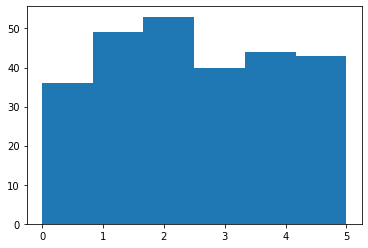

In [16]:
from matplotlib import pyplot as plt

plt.hist([dataset[i] for i in output], bins=max(dataset)+1)

plt.show()

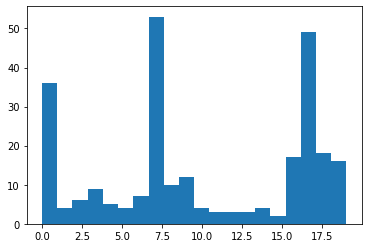

In [5]:
plt.hist(output, bins=len(dataset))

plt.show()

In [6]:
# get_class_weights(dataset)
import pandas as pd
labels = dataset


df = pd.DataFrame()
df["label"] = labels

label_to_count = df["label"].value_counts().sort_index()

torch.histc(torch.tensor(label_to_count.values), bins=max(labels)+1)


RuntimeError: "histogram_cpu" not implemented for 'Long'

In [7]:
torch.tensor(label_to_count.values)

tensor([ 1, 12,  1,  1,  2,  3])

In [8]:
max(labels)+1

6

In [9]:
label_to_count.values

array([ 1, 12,  1,  1,  2,  3])

In [17]:
torch.tensor(label_to_count.values)

tensor([ 1, 12,  1,  1,  2,  3])

In [18]:
get_class_weights(labels)

tensor([ 1, 12,  1,  1,  2,  3])

In [28]:
from myhelpers.imbalanced import inverse_weights_by_labels, get_class_weights
import torch

dataset = [0,1,1,1,1,1,1,2,5,5,1,1,1,1,1,1,5,3,4,4]

weights = get_class_weights(dataset) # dataset of 6 samples with these labels. It is the list of targets for all samples

weights/sum(weights)

tensor([0.2553, 0.0213, 0.2553, 0.2553, 0.1277, 0.0851])

In [29]:
import numpy as np
np.random.choice(len(weights), p=weights/sum(weights))

5

In [30]:
[np.random.choice(len(weights), p=weights/sum(weights)) for i in range(30)]

[4,
 0,
 3,
 2,
 0,
 3,
 4,
 3,
 2,
 5,
 0,
 5,
 2,
 3,
 3,
 0,
 4,
 3,
 4,
 3,
 2,
 0,
 3,
 3,
 0,
 2,
 0,
 0,
 3,
 0]

In [31]:
labels_logged_fordataimbalance = [1,2] + [2,3]
labels_logged_fordataimbalance

[1, 2, 2, 3]

In [1]:
import torch
if torch.cuda.is_available():
    torch.cuda.set_device(1)

import sys
sys.path.append("/home/elhamod/projects/PyTorch-GAN/implementations/pix2pix")



root ='/raid/elhamod/Fish/Curated4/Easy_200/train/Noturus flavus'
n_epochs = 200
lr = 0.0002
batch_size=1

In [2]:
from myhelpers.MakeSquared import MakeSquared

In [3]:
from torch.utils.data import Dataset
class mydataset(Dataset):
    """autoencoder dataset."""

    def __init__(self ,train , root_dir, transform , split = "training"):

        val_perc = 0.2
        self.root_dir = root_dir
        self.transform = transform
        self.frame_list = os.listdir(root_dir)
        limit = int(round(val_perc*len(self.frame_list)))
        if split == "validation":
            self.frame_list = self.frame_list[:limit]
        else :
            self.frame_list = self.frame_list[limit:]
    def __len__(self):
        return len(self.frame_list)

    def __getitem__(self, idx):

        img_name = os.path.join(self.root_dir,
                                self.frame_list[idx])
        
    
        image = Image.open(img_name)
        if self.transform:
            sample = self.transform(image)

        return sample

In [4]:
def img_denorm(img):
    #for ImageNet the mean and std are:
    mean = np.asarray([ 0.485, 0.456, 0.406 ])
    std = np.asarray([ 0.229, 0.224, 0.225 ])

    denormalize = transforms.Normalize((-1 * mean / std), (1.0 / std))
    img = denormalize(img)

    #Image needs to be clipped since the denormalize function will map some
    #values below 0 and above 1
    img = torch.clamp(img, 0, 1)
    img = img.view(img.size(0), 3, img.shape[2], img.shape[3])
    
    return(img)

In [5]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

In [6]:
from torchvision import transforms, utils
import os

trainset = mydataset(True ,root,transform=transforms.Compose([
    transforms.Lambda(MakeSquared),
#     transforms.Rescale(576,288),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                        std = [0.229, 0.224, 0.225])
]), split = "training")
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=8)


valset = mydataset(False ,root,transform=transforms.Compose([
    transforms.Lambda(MakeSquared),
#     transforms.Rescale(576,288),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                        std = [0.229, 0.224, 0.225])
]), split = "validation")
val_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size)

In [7]:
Tensor = torch.cuda.FloatTensor

In [8]:
from models import GeneratorUNet, weights_init_normal


generator = GeneratorUNet()
generator = generator.cuda()
generator.apply(weights_init_normal)

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

criterion_pixelwise = torch.nn.L1Loss()
criterion_pixelwise.cuda()

L1Loss()

In [9]:
from tqdm import tqdm_notebook as tqdm

/home/elhamod/melhamodenv3/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


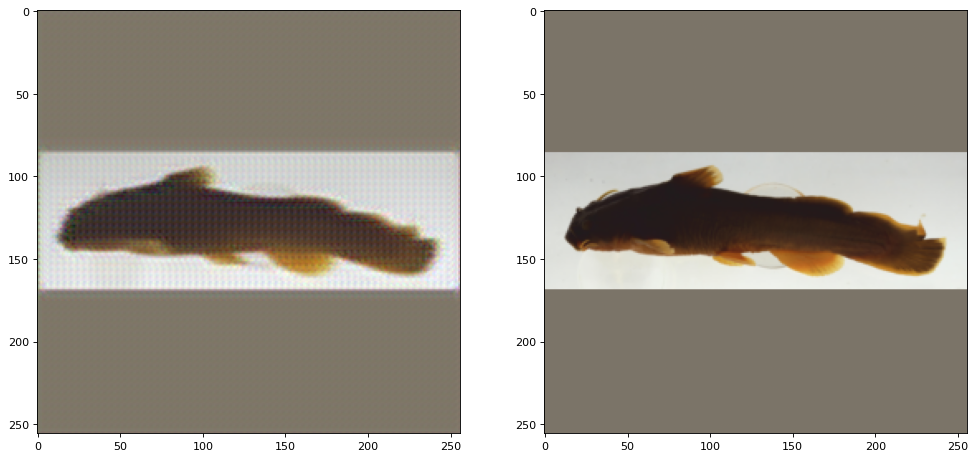

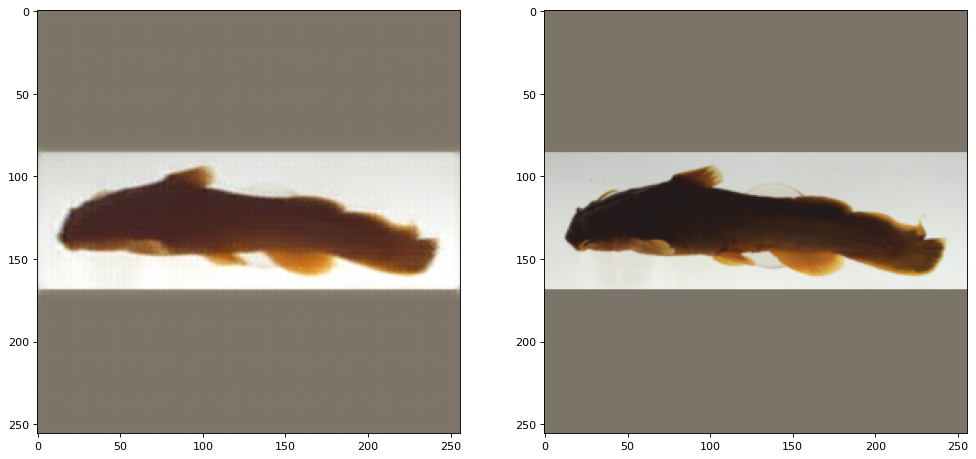

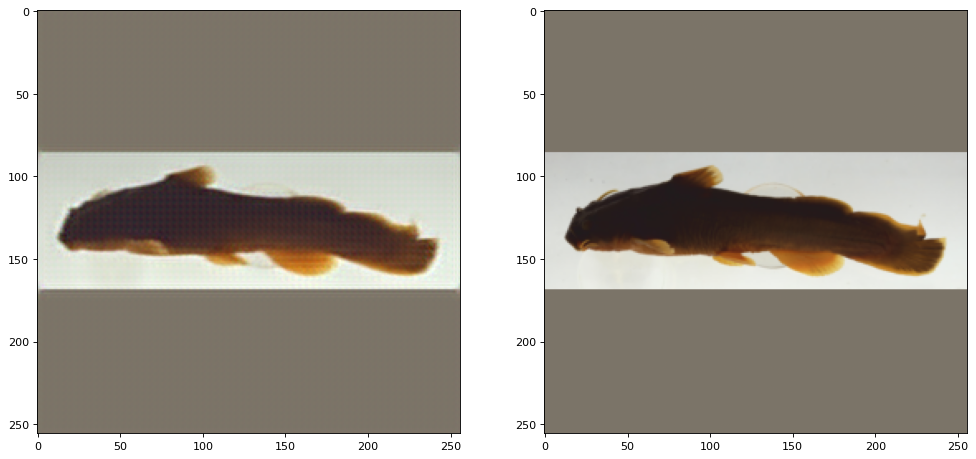

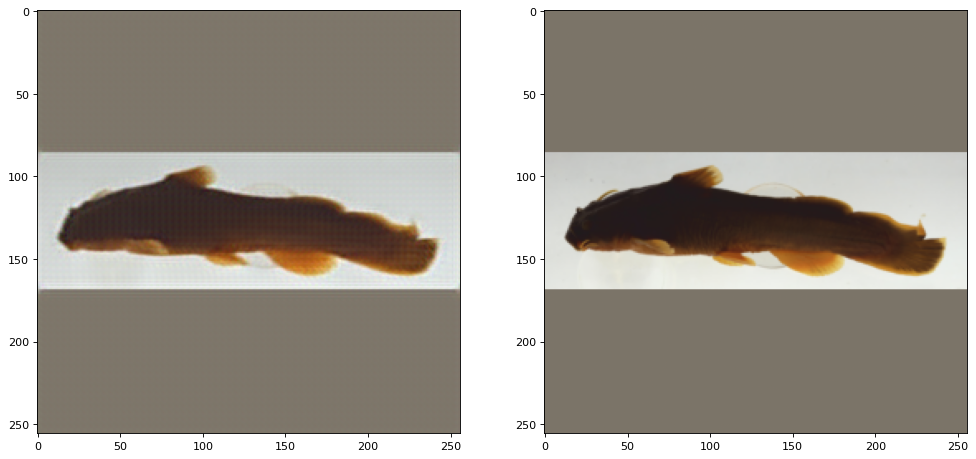

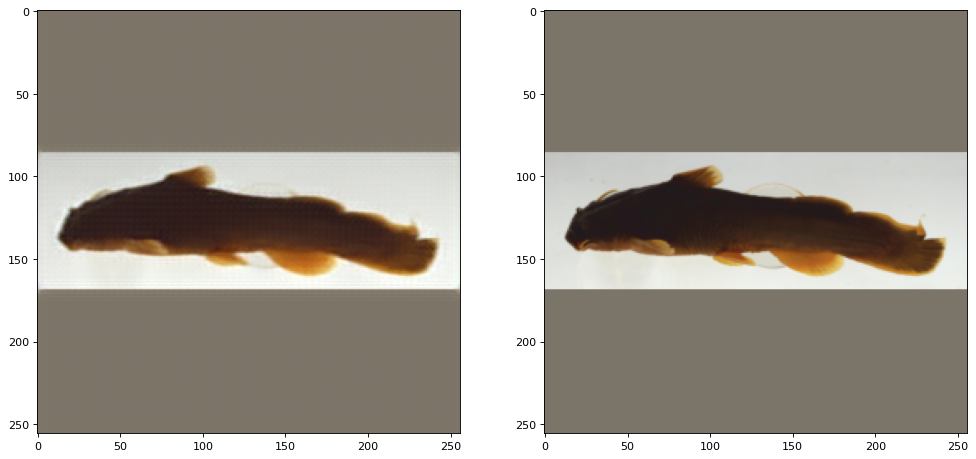

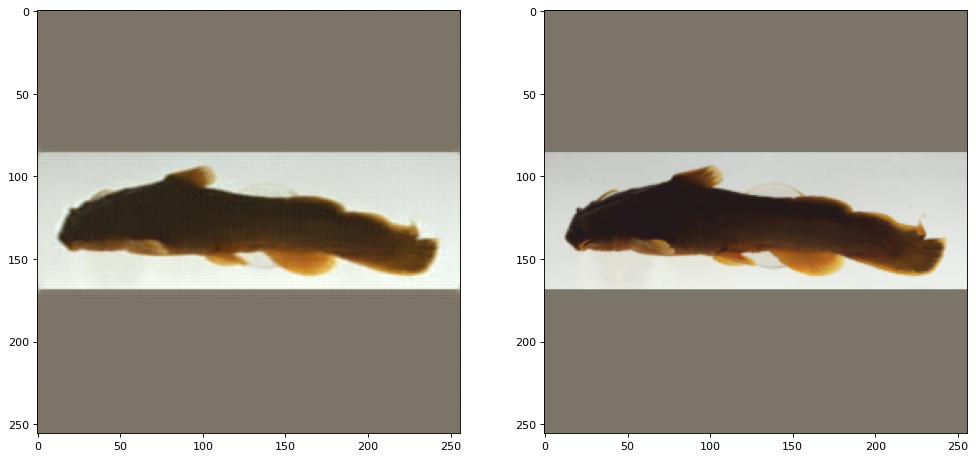

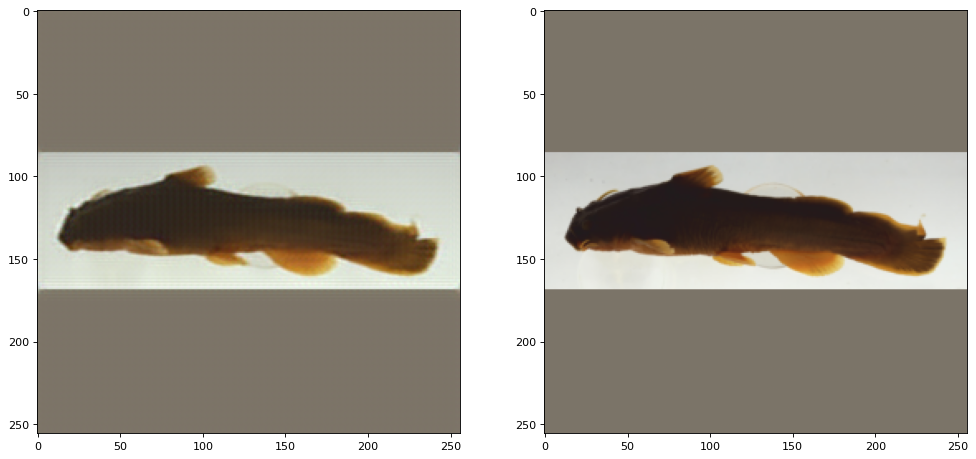

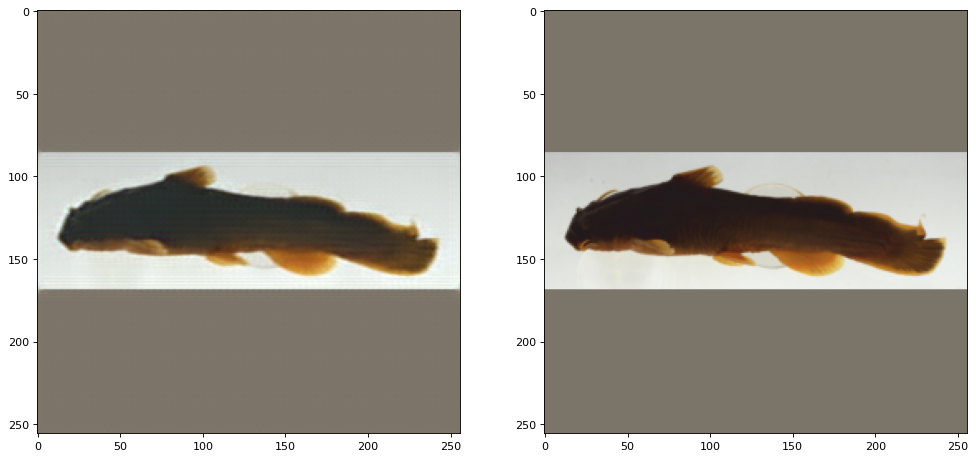

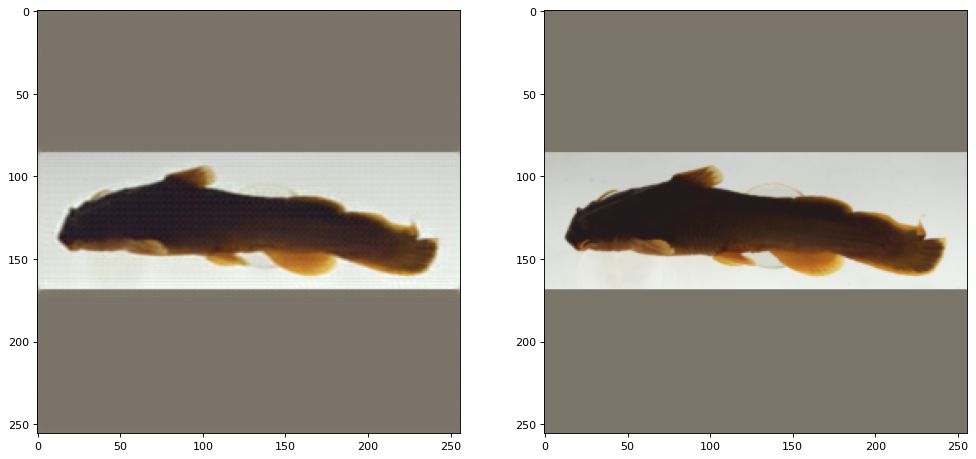

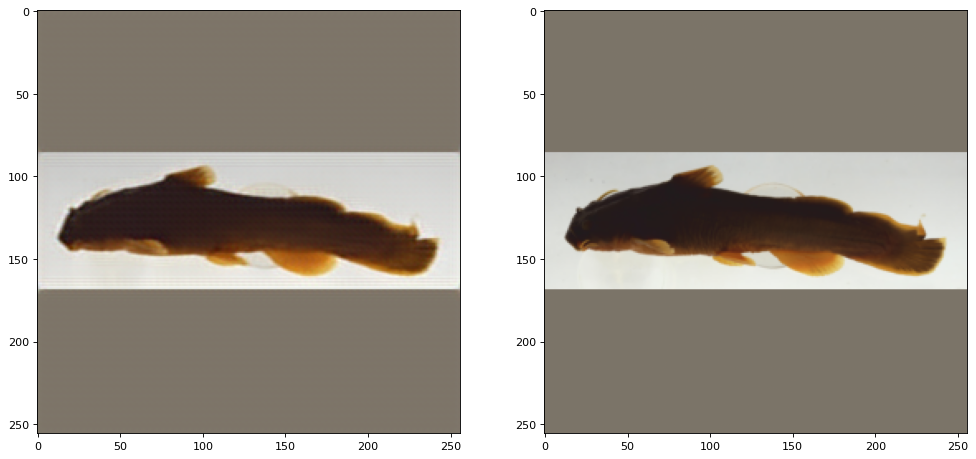

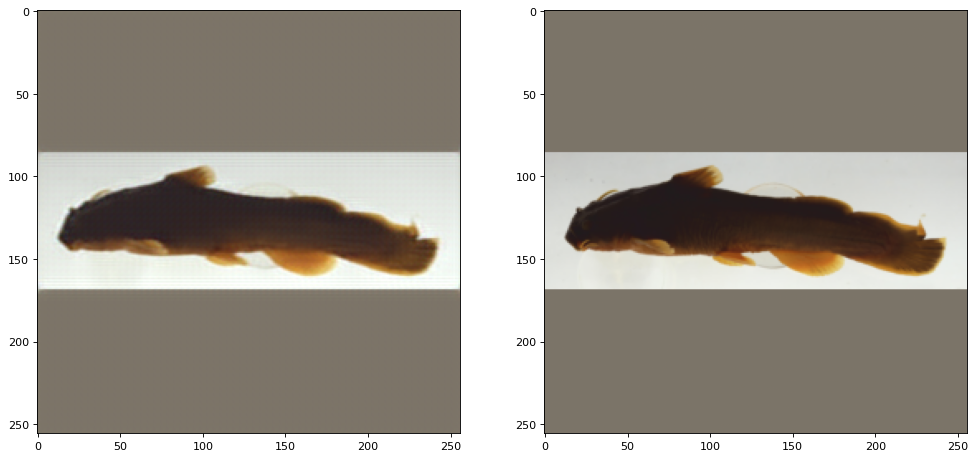

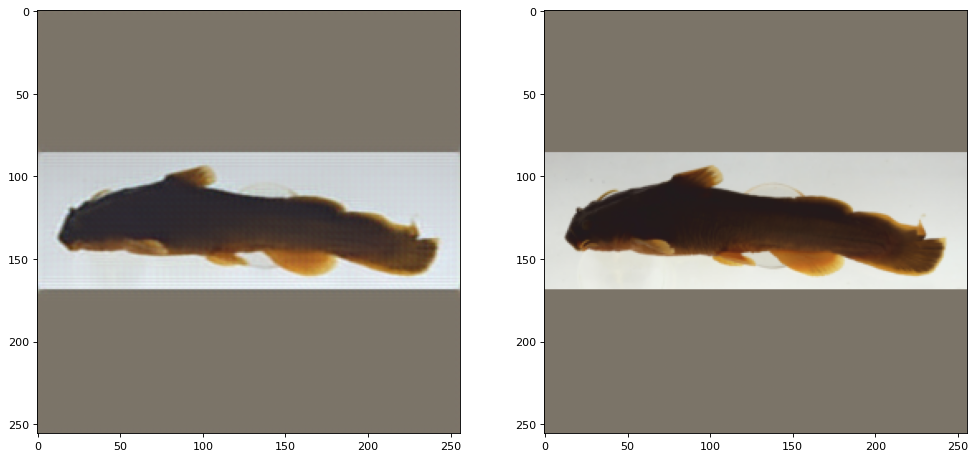

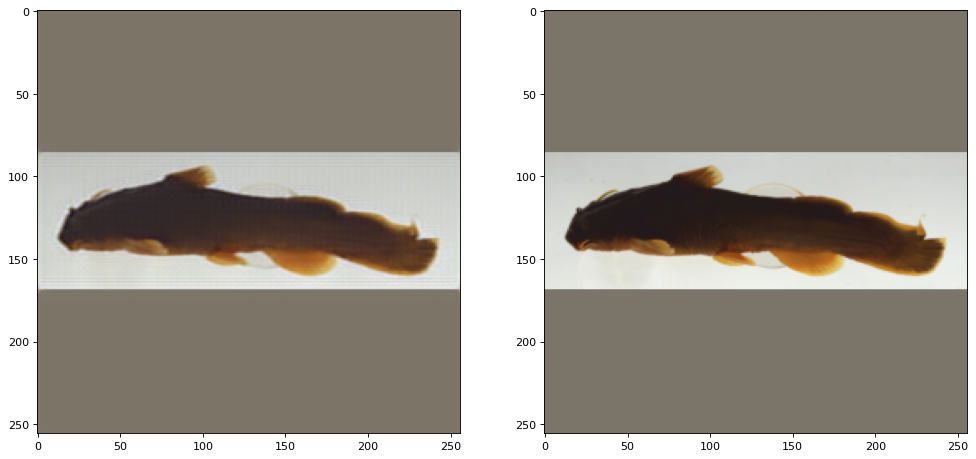

KeyboardInterrupt: 

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np

pbar = tqdm(range(n_epochs))
for epoch in pbar:
    for i, batch in enumerate(train_loader):

        # Model inputs
        img = batch.type(Tensor)

        optimizer_G.zero_grad()

        # GAN loss
        output = generator(img)
        # Pixel-wise loss
        loss_pixel = criterion_pixelwise(img, output)

        # Total loss
        loss_G = loss_pixel

        loss_G.backward()

        optimizer_G.step()
        
        
    loss_val = 0
    count = 0
    with torch.no_grad():
        for data in val_loader:
            data = data.cuda()
            output_val = generator(data)

            count = count + data.shape[0]
            loss_val = loss_val + data.shape[0]*criterion_pixelwise(output_val, data)

    pbar.set_postfix(train_loss=loss_G.item(), val_loss=loss_val.item()/count)

    if epoch % 5 == 0:
        fig, ax = plt.subplots(1, 2, figsize=(15, 15), dpi=80)
#         plt.cla()
        grid_img = utils.make_grid(img_denorm(output_val.cpu()), nrow=5)
        ax[0].imshow(grid_img.permute(1, 2, 0))
#         plt.pause(0.1)
#         figure(figsize=(15, 15), dpi=80)
        grid_img = utils.make_grid(img_denorm(data.cpu()), nrow=5)
        ax[1].imshow(grid_img.permute(1, 2, 0))
        plt.pause(0.1)
        

In [ ]:
import sys
sys.path.append("/home/elhamod/projects/PyTorch-GAN/implementations/pix2pix")

from torchsummary import summary
from models import GeneratorUNet, weights_init_normal

imageDimension = 256

summary(GeneratorUNet().cuda(), (3, imageDimension, imageDimension))

In [ ]:
print(GeneratorUNet())